In [15]:
import sys
sys.path.append('..')
import tangles
import cost_functions
import cut_finding
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time

import pandas as pd

import numpy as np
import random

from sklearn.datasets import make_blobs

import sklearn.metrics
import tqdm
import importlib
import time
import cut_finding
import plotting
import dataset_generation

def reload():
    importlib.reload(tangles)
    importlib.reload(cost_functions)
    importlib.reload(cut_finding)
    importlib.reload(tangles)
    importlib.reload(plotting)
    importlib.reload(dataset_generation)



In [27]:

n_clusters = 3
dimensions = 2
data_size = 1000
min_distance = 5

data, labels = dataset_generation.create_2d_test_data(
                n_clusters=n_clusters,
                dimensions=dimensions,
                scales=np.random.choice([0.5, 2], size=(n_clusters, 2)),
                weights = np.ones(n_clusters),
                num_samples=data_size,
                min_distance=min_distance
            )

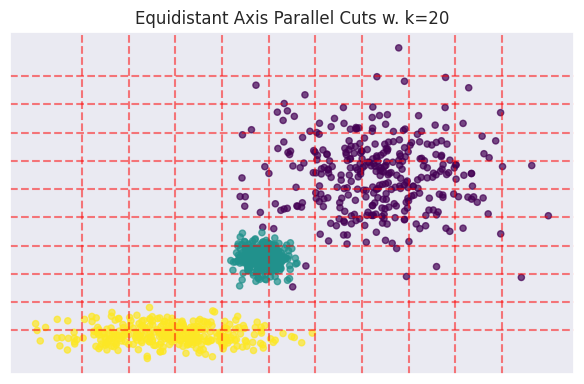

In [40]:

import seaborn as sns

sns.set_theme(style="dark")


MinMaxScaler = lambda x: (x - x.min()) / (x.max() - x.min())
data = MinMaxScaler(data)

dimensions = data.shape[1]
k = 10
cuts = np.zeros((data.shape[0], dimensions*k), dtype=np.int8)
i = 0

plt.figure(figsize=(6, 4))

for dimension in range(dimensions):
    splits = np.linspace(data[:, dimension].min(),
                            data[:, dimension].max(), k+2)[1:-1]
    for split in splits:
        if dimension == 0:
            plt.axvline(split, color='red', linestyle='--', alpha=0.5)
        else:
            plt.axhline(split, color='red', linestyle='--', alpha=0.5)

        cuts[data[:, dimension] < split, i] = 1
        i += 1


plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7, s=20)
plt.xticks([])
plt.yticks([])
plt.title("Equidistant Axis Parallel Cuts w. k=20")

plt.tight_layout()
plt.savefig('axis_parallel_cuts.png', dpi=300, bbox_inches='tight')

plt.show()

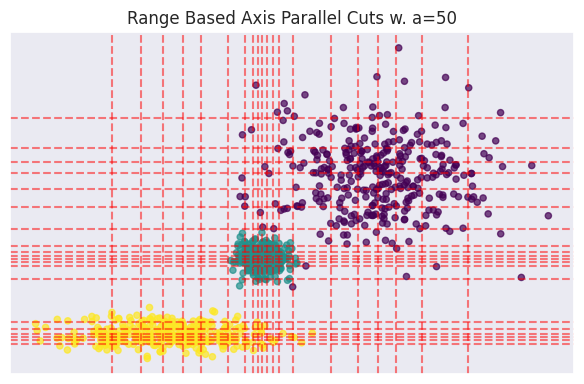

In [41]:

agreement_param = 50
if agreement_param < 1:
        agreement_param = int(np.floor(
            data.shape[0] * agreement_param))

assert agreement_param > 1

cuts = []
dimensions = data.shape[1]
length = data.shape[0]

plt.figure(figsize=(6, 4))

for dimension in range(dimensions):
    points_one_side = agreement_param - 1
    sorted_indices = np.argsort(data[:, dimension])
    while True:
        if points_one_side >= len(data):
            break
        cut = np.zeros(length, dtype=np.int8)
        cut[sorted_indices[:points_one_side]] = 1
        if dimension == 0:

            plt.axvline(data[sorted_indices[:points_one_side], dimension].max(), color='red', linestyle='--', alpha=0.5)
        else:
            plt.axhline(data[sorted_indices[:points_one_side], dimension].max(), color='red', linestyle='--', alpha=0.5)
        # print(data[sorted_indices[:points_one_side], dimension].max())

        cuts.append(cut)
        points_one_side += agreement_param - 1


plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7, s=20)
plt.xticks([])
plt.yticks([])
plt.title("Range Based Axis Parallel Cuts w. a=50")

plt.tight_layout()
plt.savefig('range_axis_parallel_cuts.png', dpi=300, bbox_inches='tight')